### **0. Set-up**

In [1]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [2]:
# Load NL predicted
nl_f9_1 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f9-1.csv")
nl_f9_2 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f9-2.csv")
nl_f9_3 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f9-3.csv")

# Combine dataframes
raw_nl_pred = pd.concat([nl_f9_1, nl_f9_2, nl_f9_3], ignore_index=True)

In [3]:
# Load EN predicted
en_f9_1 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f9-1.csv")
en_f9_2 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f9-2.csv")
en_f9_3 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f9-3.csv")

# Combine dataframes
raw_en_pred = pd.concat([en_f9_1, en_f9_2, en_f9_3], ignore_index=True)

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [4]:
# Select first 25 word pairs
raw_nl_pred = raw_nl_pred.head(25)
raw_en_pred = raw_en_pred.head(25)

In [5]:
# Show results
raw_nl_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,oud,nieuw,0.10,1.91,1.00,0.14,2.00,0.25,1.00,0.10,1.00,1.00,1.00,0.10,1.00,1.00,0.20
1,slim,intelligent,8.50,9.00,8.70,9.00,9.00,9.50,8.50,9.00,9.00,9.50,8.50,8.50,8.50,8.50,8.50
2,hard,moeilijk,7.50,7.20,7.50,8.00,9.50,8.00,8.50,8.50,8.50,8.50,8.50,7.50,6.50,7.50,9.00
3,gelukkig,vrolijk,5.80,6.50,7.50,8.50,0.65,7.50,7.50,9.00,7.50,7.50,6.50,7.50,7.50,7.50,7.50
4,hard,stoer,6.00,0.30,6.00,6.50,7.50,7.50,0.60,5.50,5.65,0.30,6.50,0.20,5.00,0.40,6.00
5,snel,razendsnel,9.50,8.50,9.00,9.00,9.00,9.50,9.00,8.50,8.50,9.00,9.00,8.50,8.90,9.00,9.00
6,gelukkig,blij,7.50,7.95,7.80,8.60,7.50,7.50,7.50,8.50,8.80,8.50,6.75,7.50,7.50,8.50,7.50
7,kort,lang,0.00,0.00,0.00,1.00,0.00,0.10,0.10,0.10,0.00,0.10,1.00,0.00,0.00,0.00,0.00
8,dom,stom,8.50,8.50,8.00,9.00,9.00,8.50,8.50,8.50,9.50,9.00,9.00,9.00,8.50,9.00,9.50
9,vreemd,eigenaardig,8.50,8.50,8.50,8.50,7.50,8.50,8.50,8.50,8.50,8.50,8.50,8.50,8.50,7.50,7.50


In [6]:
# Show results
raw_en_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,old,new,0.10,2.00,1.00,1.00,0.10,1.00,0.00,0.09,0.00,1.00,1.00,0.00,0.00,0.01,2.00
1,smart,intelligent,9.50,9.50,9.50,9.50,9.50,9.50,9.00,9.00,9.50,8.00,9.50,9.50,9.00,9.50,8.00
2,hard,difficult,9.50,9.00,9.50,9.50,9.00,9.00,9.00,9.50,9.50,9.00,9.50,9.50,8.50,9.50,9.00
3,happy,cheerful,9.50,9.50,9.80,9.50,9.50,9.00,9.70,9.50,9.50,9.50,9.75,9.50,9.50,9.50,9.00
4,hard,easy,2.50,1.00,1.50,1.00,1.67,2.33,1.58,0.10,1.00,1.00,1.00,1.67,0.21,0.10,1.20
5,fast,rapid,8.50,9.00,9.50,9.00,9.00,9.00,8.80,9.50,9.00,9.00,9.00,9.00,9.50,9.50,9.50
6,happy,glad,9.50,9.50,8.70,9.50,9.00,9.00,9.50,9.80,9.50,9.50,9.50,8.50,9.50,9.50,9.00
7,short,long,0.20,2.00,2.00,1.00,1.00,0.33,1.00,1.00,1.00,0.00,2.00,0.00,1.00,1.00,1.00
8,stupid,dumb,8.00,9.00,8.50,9.50,9.00,9.00,9.60,9.00,8.50,9.00,9.50,9.75,8.50,9.00,9.50
9,weird,strange,8.50,8.70,9.00,8.50,8.00,8.50,8.50,9.00,8.00,8.50,8.50,8.50,8.75,8.50,9.00


### **1. Data Processing**

In [7]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
nl_pred['nl_pred_sl'] = nl_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
nl_pred['nl_pred_sd'] = nl_pred[similarity_cols].std(axis=1).round(2)

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl', 'nl_pred_sd']]

# Show results
nl_pred

,word1,word2,nl_pred_sl,nl_pred_sd
0,oud,nieuw,0.79,0.63
1,slim,intelligent,8.81,0.36
2,hard,moeilijk,8.05,0.77
3,gelukkig,vrolijk,6.96,1.90
4,hard,stoer,4.26,2.93
5,snel,razendsnel,8.93,0.32
6,gelukkig,blij,7.86,0.59
7,kort,lang,0.16,0.34
8,dom,stom,8.80,0.41
9,vreemd,eigenaardig,8.30,0.41


In [8]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
en_pred['en_pred_sl'] = en_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
en_pred['en_pred_sd'] = en_pred[similarity_cols].std(axis=1).round(2)

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl', 'en_pred_sd']]

# Show results
en_pred

,word1,word2,en_pred_sl,en_pred_sd
0,old,new,0.62,0.72
1,smart,intelligent,9.20,0.53
2,hard,difficult,9.23,0.32
3,happy,cheerful,9.48,0.22
4,hard,easy,1.19,0.72
5,fast,rapid,9.12,0.31
6,happy,glad,9.30,0.37
7,short,long,0.97,0.66
8,stupid,dumb,9.02,0.49
9,weird,strange,8.56,0.30


In [9]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,nl_pred_sd,word1,word2,en_pred_sl,en_pred_sd
0,oud,nieuw,0.79,0.63,old,new,0.62,0.72
1,slim,intelligent,8.81,0.36,smart,intelligent,9.20,0.53
2,hard,moeilijk,8.05,0.77,hard,difficult,9.23,0.32
3,gelukkig,vrolijk,6.96,1.90,happy,cheerful,9.48,0.22
4,hard,stoer,4.26,2.93,hard,easy,1.19,0.72
5,snel,razendsnel,8.93,0.32,fast,rapid,9.12,0.31
6,gelukkig,blij,7.86,0.59,happy,glad,9.30,0.37
7,kort,lang,0.16,0.34,short,long,0.97,0.66
8,dom,stom,8.80,0.41,stupid,dumb,9.02,0.49
9,vreemd,eigenaardig,8.30,0.41,weird,strange,8.56,0.30


### **2. Descriptive Statistics**

In [10]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Summary statistics standard deviations
nl_pred_sd_summary = round(nl_pred['nl_pred_sd'].describe(), 2)
en_pred_sd_summary = round(en_pred['en_pred_sd'].describe(), 2)

# Add median standard deviation
nl_pred_sd_summary['median'] = round(nl_pred['nl_pred_sd'].median(), 2)
en_pred_sd_summary['median'] = round(en_pred['en_pred_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary,
    "nl_pred_sd": nl_pred_sd_summary,
    "en_pred_sd": en_pred_sd_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,5.53,5.57,0.80,0.65
std,3.63,3.73,0.64,0.41
min,0.16,0.62,0.13,0.22
25%,1.13,1.19,0.41,0.37
50%,7.81,7.61,0.60,0.53
75%,8.55,8.93,0.76,0.75
max,9.24,9.48,2.93,2.12
median,7.81,7.61,0.60,0.53


#### **2.1. SimLex-999**

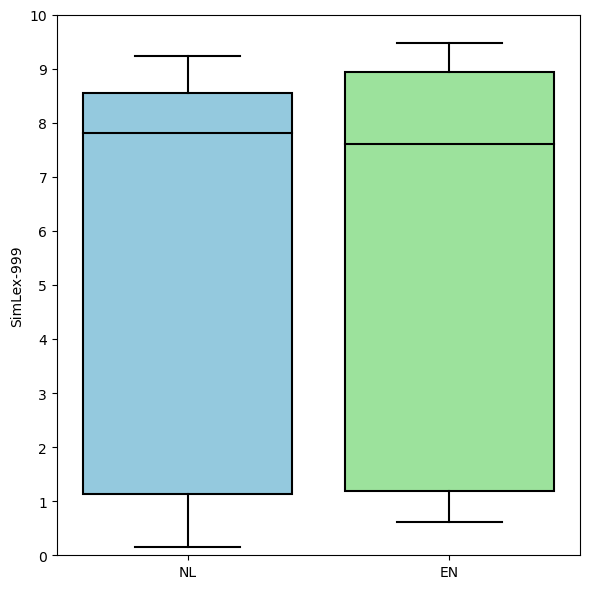

In [11]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **2.2. Standard Deviation**

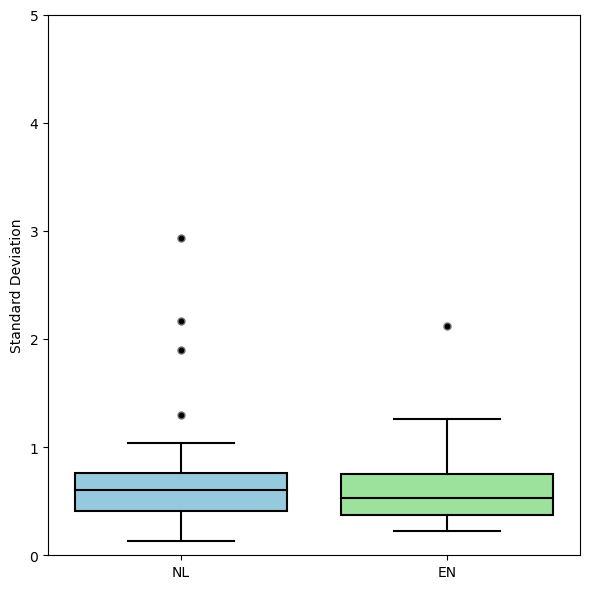

In [12]:
# Rename columns and copy
renamed_nl_pred_sd = nl_pred.rename(columns={"nl_pred_sd": "Standard Deviation"}).copy()
renamed_en_pred_sd = en_pred.rename(columns={"en_pred_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_pred_sd['Score'] = 'NL'
renamed_en_pred_sd['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sd, renamed_en_pred_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

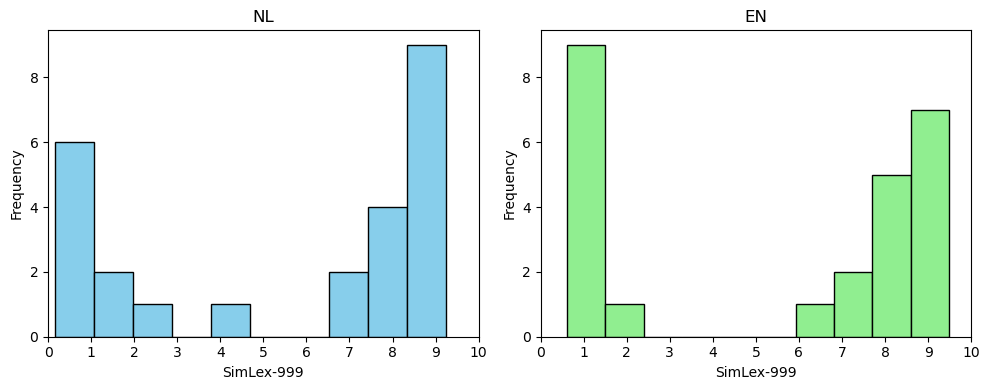

In [13]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

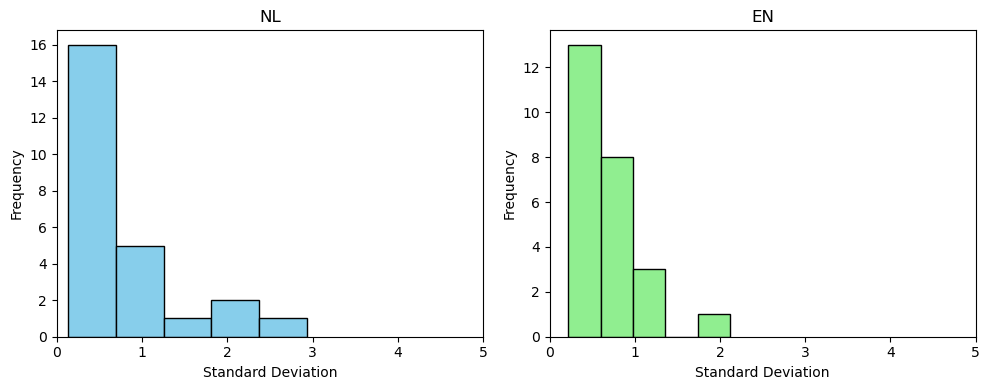

In [14]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [15]:
# Count outliers
print_outlier_counts(nl_pred)

Outliers in nl_pred_sd: 4
No outliers found in columns: nl_pred_sl


In [16]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sd')


Outliers in nl_pred_sd:
         word1        word2  nl_pred_sl  nl_pred_sd
3     gelukkig      vrolijk        6.96        1.90
4         hard        stoer        4.26        2.93
12    moeilijk  gemakkelijk        8.49        2.17
16  uitgebreid        groot        2.47        1.30


#### **4.2. EN**

In [17]:
# Count outliers
print_outlier_counts(en_pred)

Outliers in en_pred_sd: 1
No outliers found in columns: en_pred_sl


In [18]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sd')


Outliers in en_pred_sd:
        word1     word2  en_pred_sl  en_pred_sd
22  wonderful  terrific        8.22        2.12


#### **4.3. Add to Summary**

In [19]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_nl_pred_sd = calculate_outliers(nl_pred, 'nl_pred_sd')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')
outliers_en_pred_sd = calculate_outliers(en_pred, 'en_pred_sd')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_nl_pred_sd = outliers_nl_pred_sd.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]
count_outliers_en_pred_sd = outliers_en_pred_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl, count_outliers_nl_pred_sd, count_outliers_en_pred_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,5.53,5.57,0.80,0.65
std,3.63,3.73,0.64,0.41
min,0.16,0.62,0.13,0.22
25%,1.13,1.19,0.41,0.37
50%,7.81,7.61,0.60,0.53
75%,8.55,8.93,0.76,0.75
max,9.24,9.48,2.93,2.12
median,7.81,7.61,0.60,0.53
outliers,0.00,0.00,4.00,1.00


### **5. Correlation**

#### **5.1. SimLex-999 vs Standard Deviation**

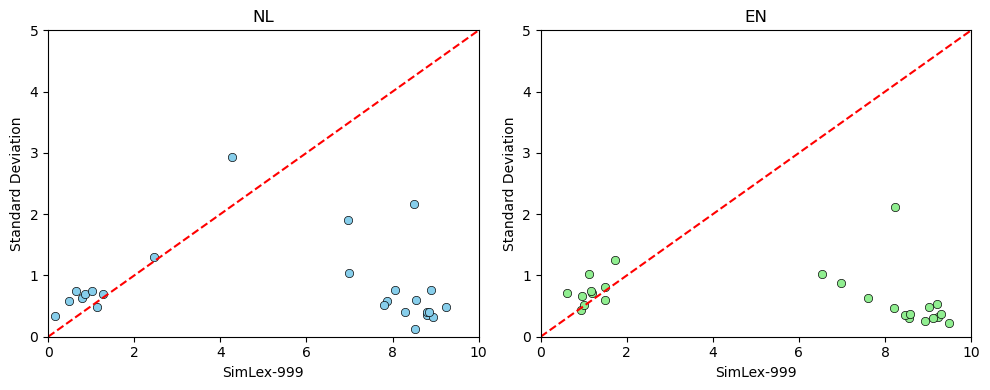

In [20]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='nl_pred_sl', y='nl_pred_sd', data=nl_pred, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_pred_sl', y='en_pred_sd', data=en_pred, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [21]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(conc, 'nl_pred_sl', 'nl_pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(conc, 'en_pred_sl', 'en_pred_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_pred_sl,nl_pred_sd,-0.29055,0.158836,not significant
1,en_pred_sl,en_pred_sd,-0.59958,0.001536,significant


### **6. Evaluation Metrics**

#### **6.1. Spearmans's Rank Correlation**

##### **6.1.1. NL SimLex-999 vs EN SimLex-999**

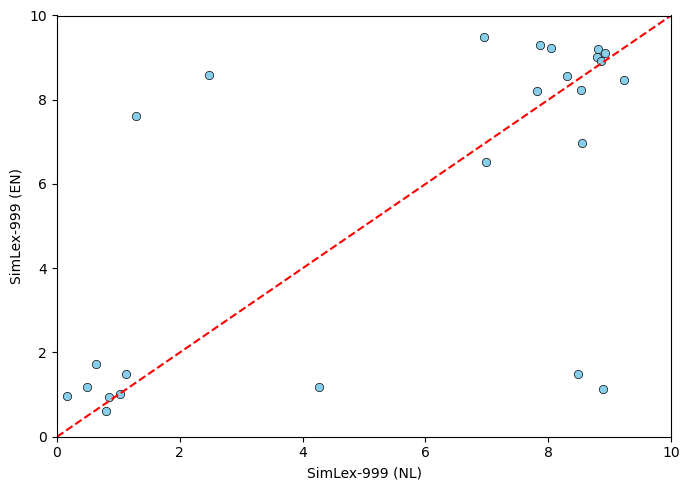

In [22]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [23]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.57077
P-value: 0.0028862249955300817
The correlation is statistically significant.



##### **6.1.2. NL Standard Deviation vs EN Standard Deviation**

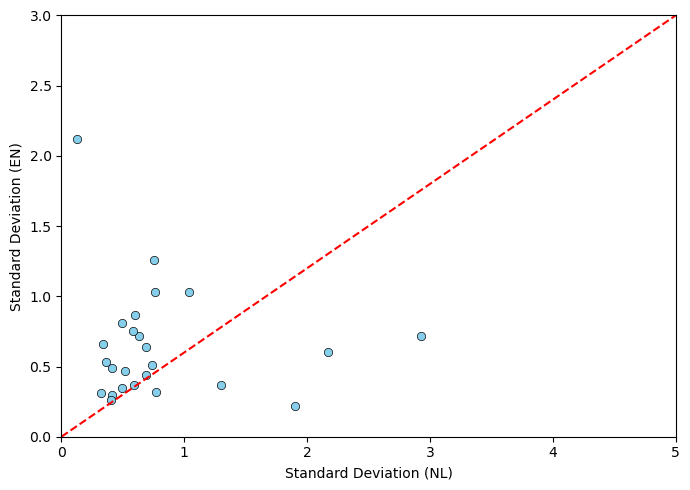

In [24]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sd', 'en_pred_sd', 'Standard Deviation (NL)', 'Standard Deviation (EN)', 0, 5, 0, 3)

In [25]:
# Correlation and p-value
print_correlation_and_pvalue(conc, 'nl_pred_sd', 'en_pred_sd')

Spearman's Rank correlation: 0.08972
P-value: 0.6697507747744149
The correlation is not statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [26]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 8.48


#### **7.3. Mean Absolute Error (MAE)**

In [27]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.73
